## 人脸识别
1. 人脸有不同的颜色组成
2. 不同的颜色由三原色：红绿蓝组成
3. 红绿蓝由0~255的数字组成

### 所以人脸是由数据组成的

### 使用matplotlib.pyplot导入数据图片并显示,观察这张图片的数据类型

GridSearchCV 查找最优的条件：参数

PCA降维，图片的数据比较大，维度 28*28 = 784
437*640 = 273280

## 进行人脸识别操作
1.导入相应模块工具：GridSearchCV、fetch_lfw_people、PCA、loggin等  


2.设置logging，控制台显示程序处理数据的进度  


3.使用fetch_lfw_people导入数据，如果本地没有会从网络下载，如果本地有数据，加载本地  


4.查看人脸数据结构  


5.从人脸数据中提取进行机器学习的关键数据  


6.对数据进行分割，获取训练数据和测试数据  


7.数据太复杂了，使用PCA对数据进行降维处理，去除一些不重要的数据  


8.使用GridSerchCV查询最佳的机器学习模型  


9.定义方法获取预测人名和真实人名  


10.定义方法绘制人脸识别结果图形  


11.调用方法进行数据展示  


导入相应模块工具：GridSearchCV、fetch_lfw_people、PCA、logging等 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA 
from sklearn.datasets import fetch_lfw_people 
import logging
from sklearn.model_selection import train_test_split


设置logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')  
控制台输出记录数据，显示程序处理数据的进度

In [3]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s % (message)s')

使用fetch_lfw_people导入数据，如果本地没有会从网络下载，如果本地有数据，加载本地

In [14]:
faces = fetch_lfw_people(min_faces_per_person=70, resize=1, slice_=(slice(0, 250, None), slice(0, 250, None)))

In [15]:
images = faces.images

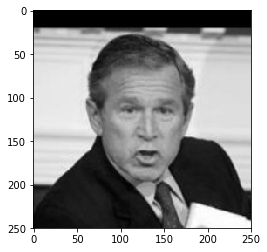

In [17]:
plt.imshow(images[20], cmap='gray')

In [13]:
images[10].shape

(125, 94)

查看人脸数据结构

从人脸数据中提取进行机器学习的关键数据

In [19]:
data = faces.data
data.shape
target = faces.target

分割训练数据和预测数据

In [61]:
X_train,X_test,y_train,y_test = train_test_split(data, target, test_size=50)

In [22]:
X_train.shape

(1238, 62500)

使用PCA进行降维

In [62]:
pca = PCA(300, whiten=True, svd_solver='randomized')
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=300, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=True)

In [63]:
# 降维
X_train_pca = pca.transform(X_train)

In [27]:
X_train_pca.shape

(1238, 300)

使用GridSearchCV我们找到了最佳的支持向量机方法

In [64]:
# C : 对错误的容忍度,C越大,对错误容忍度越高.
# gamma: 0.00333
svc = SVC()

In [65]:
C = [1.5,2.0,2.5, 3.0]
gamma = [0.001, 0.002, 0.003]
param_grid = {'C': C, 'gamma': gamma}
gv = GridSearchCV(svc, param_grid=param_grid)
gv.fit(X_train_pca, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1.5, 2.0, 2.5, 3.0], 'gamma': [0.001, 0.002, 0.003]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [66]:
svc_gv = gv.best_estimator_

In [67]:
gv.best_params_
gv.best_score_

0.7075928917609047

进行数据预测

In [68]:
X_test_pca = pca.transform(X_test)

In [69]:
y_ = svc_gv.predict(X_test_pca)

In [44]:
display(y_, y_test)

array([0, 3, 3, 3, 3, 3, 1, 3, 4, 3, 3, 3, 2, 2, 4, 1, 1, 3, 1, 3, 6, 3,
       1, 3, 5, 4, 3, 1, 6, 1, 6, 6, 3, 2, 5, 1, 4, 5, 1, 3, 6, 4, 1, 1,
       3, 3, 2, 6, 0, 0], dtype=int64)

array([0, 3, 3, 3, 3, 3, 1, 3, 4, 3, 3, 3, 4, 2, 4, 1, 1, 3, 1, 3, 6, 3,
       1, 3, 5, 4, 3, 1, 6, 1, 6, 6, 3, 2, 5, 1, 4, 5, 1, 3, 6, 4, 1, 1,
       3, 3, 2, 6, 0, 0], dtype=int64)

定义方法获取预测人名和真实人名 

调用方法获取人脸预测的名字，以及人脸的真实名字

定义方法绘制人脸识别结果图形

In [45]:
X_test[::2].shape

(25, 62500)

In [50]:
target_name = faces.target_names
target_name

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [51]:
y_test

array([0, 3, 3, 3, 3, 3, 1, 3, 4, 3, 3, 3, 4, 2, 4, 1, 1, 3, 1, 3, 6, 3,
       1, 3, 5, 4, 3, 1, 6, 1, 6, 6, 3, 2, 5, 1, 4, 5, 1, 3, 6, 4, 1, 1,
       3, 3, 2, 6, 0, 0], dtype=int64)

In [53]:
target_name[y_test[1]]

'George W Bush'

In [70]:
svc_gv.score(X_test_pca, y_test)

0.82

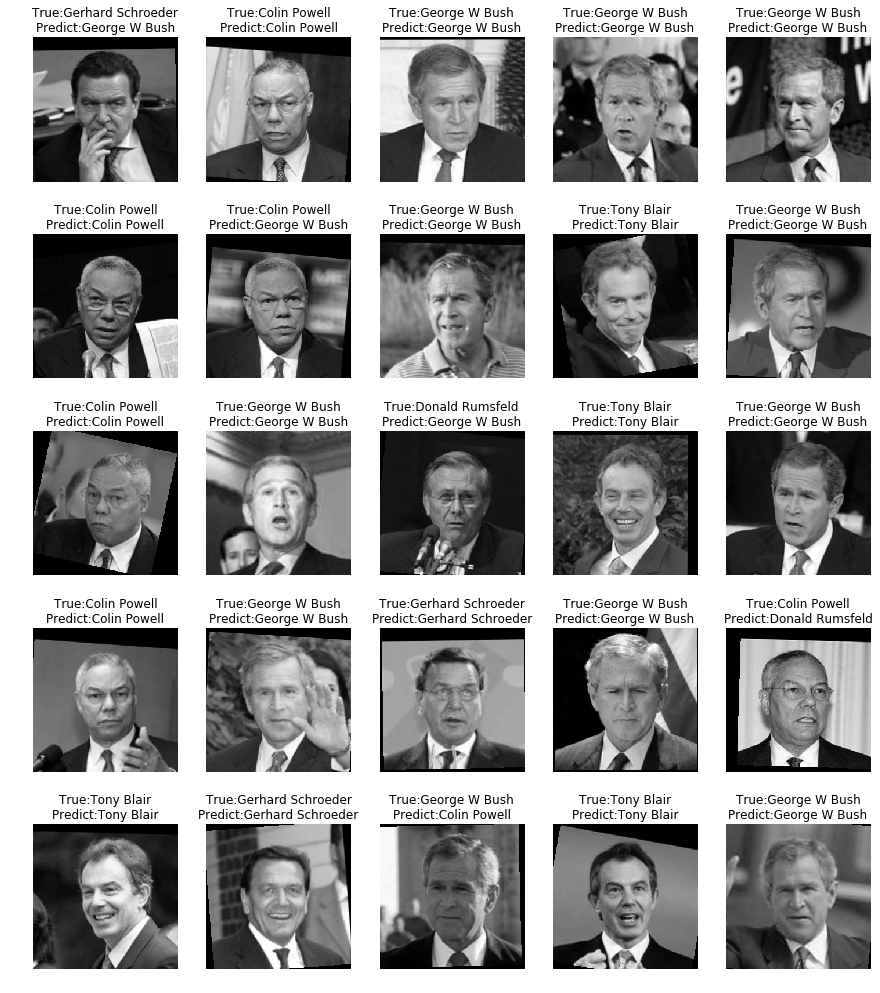

In [71]:
# 直接画图
plt.figure(figsize=(5*3,5* 3.5))
for i in range(25):
    axes = plt.subplot(5,5,i + 1)
    axes.imshow(X_test[i*2].reshape((250,250)), cmap='gray')
    axes.set_title('True:%s\nPredict:%s' % (target_name[y_test[i*2]], target_name[y_[i*2]]))
    axes.axis('off')

调用方法，显示数据

网络上查找图片使用机器学习模型进行预测

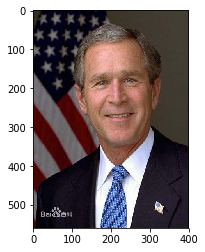

In [72]:
bush = plt.imread('bush.jpg')
plt.imshow(bush)

In [73]:
bush.shape

(560, 400, 3)

In [ ]:
# 灰度化


In [45]:
import scipy.ndimage as ndimage

读取网络数据进行灰度处理gray = [0.299,0.587,0.114]  
如果是jpg图片进行归一化操作

In [74]:
bush_gray = np.dot(bush, [0.299,0.587,0.114])


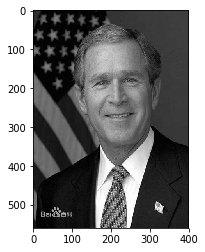

In [76]:
plt.imshow(bush_gray, cmap='gray')

如果图片尺寸不符合要求，那么修改尺寸

In [78]:

x = 250/560
y = 250/400

In [77]:
import scipy.ndimage as ndimage

In [79]:
bush_resize = ndimage.zoom(bush_gray, zoom=[x,y])

In [80]:
bush_resize.shape

(250, 250)

In [82]:
bush_resize = bush_resize.reshape(1, -1)


array([[49.665     , 46.59233076, 50.59417608, ..., 30.03017561,
        23.6177952 , 34.162     ]])

In [83]:
bush_resize.shape

(1, 62500)

In [85]:
# 先来降温
bush_pca = pca.transform(bush_resize)

In [86]:
bush_pca.shape

(1, 300)

In [87]:
# 预测
svc_gv.predict(bush_pca)

array([3], dtype=int64)

In [88]:
target_name[[3]]

array(['George W Bush'], dtype='<U17')